<a href="https://colab.research.google.com/github/yunions/Statistics/blob/master/Chap9_%EB%8F%85%EB%A6%BD%EB%8F%99%EC%9D%BC%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [2]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

# 09. 독립동일분포


## 9.1 독립성

### 9.1.1 독립성의 정의
**독립성(independence)** </br>
: 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념</br>
n개의 확률 변수 $X_1, X_2, ... ,X_n$ 이 다음을 만족할 때, $X_1, X_2, ... X_n$은 서로 **독립**이라고 한다.</br>
$$f_{X_1, X_2, ... ,X_n} = f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)$$
- 2차원 확률변수$(X,Y)$의 경우, 다음과 같은 관계가 성립할 때 X와 Y는 독립이다</br>
$$f_{X,Y}(x,y) = f_X(x)f_Y(y)$$
→ 즉, 확률변수가 독립 = 주변확률의 곱 = 곱연산 가능</br>


### 9.1.2 독립성과 무상관성
**무상관성(Uncorrelatedness)**</br>
: 공분산이나 상관계수가 0인 상태 = 선형관계가 없음</br>
- Q. 독립성? 무상관성?  
$\quad$ 2개의 확률변수 X,Y가 독립 = X,Y는 무상관 **but** X,Y가 무상관일 때, X,Y가 반드시 독립은 아님

In [10]:
x_set = np.array([1, 2, 3, 4, 5, 6]) #2개의 주사위(독랍)
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y): #2차원 확률 변수 관계 정의(곱)
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0
    
XY_i = [x_set, y_set, f_XY] #XY 계산
Cov(XY_i) #XY의 공분산 = 0 즉, 무상관

-0.000

In [11]:
x_set = np.array([0, 1]) #2개의 set 정의
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3 #2개의 결과 조합이 각각 확률이 1/3로 동일
    else:
        return 0 #위의 조합외에는 확률이 모두 0으로 동일
    
XY_c = [x_set, y_set, f_XY]
Cov(XY_c) #XY의 공분산 = 0 즉, 무상관

0.000

In [13]:
f_X(0) * f_Y(0), f_XY(0, 0) #두 함수의 곱과 2차원 확률변수의 결과값이 동일하지 않음 = 독립이 아님

(0.111, 0.333)

## 9.2 합의 분포
**합의 확률분포**</br>
: 서로 독립이고 동일한 확률 분포를 따르는 $X_1, X_2, ... X_n$의 합 $\sum_{k=1}^n X_i = X_1 + X_2 + ... + X_n$이 따르는 확률 분포
- 확률변수 합의 기댓값(독립이 아니여도 괜찮음)</br>
: 확률 변수 $X_1, X_2, ... X_n$에 관해서, 아래의 공식이 성립한다.
$$E(X_1 + X_2 + ... + X_n) = E(X_1) + E(X_2) + ... + E(X_n)$$
- 확률변수 합의 분산값(독립인 경우)</br>
: 확률 변수 $X_1, X_2, ... X_n$가 독립이면, 아래의 공식이 성립한다.
$$V(X_1 + X_2 + ... + X_n) = V(X_1) + V(X_2) + ... + V(X_n)$$

### 9.2.1 정규분포의 합의 분포
: 서로 독립인 확률변수 $X_1 \sim N(\mu_1,\sigma_1), X_2 \sim N(\mu_2,\sigma_2), ... , X_n \sim N(\mu_n,\sigma_n)$에 관해서, 아래의 공식이 성립한다.
$$\sum_{i = 1}^n{X_i} \sim N(\sum_{i = 1}^n{\mu_i},\sum_{i = 1}^n{\sigma^2_i})$$

In [46]:
rv1 = stats.norm(1, np.sqrt(2)) #정규분포 2개 생성 rv1 ~ N(1,√2), rv2 ~ N(2,√3) 
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6) #sample 생성
X_sample = rv1.rvs(sample_size) #rv1의 분포를 기준으로 sample size만큼 랜덤표본 생성
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample #두 샘플의 합
print(f'E(X+Y) = {np.mean(sum_sample) : .3f}, E(X) + E(Y) = {rv1.mean() + rv2.mean()}',
      f'\nV(X+Y) = {np.var(sum_sample) : .3f}, V(X) + V(Y) = {rv1.var() + rv2.var()} \n') #이론에 가까운 값이 나옴을 확인 가능

E(X+Y) =  3.004, E(X) + E(Y) = 3.0 
V(X+Y) =  5.004, V(X) + V(Y) = 5.0 



**재생성(reproductive property)**</br>
: 동일한 분포를 따르는 2개의 독립 확률변수에 대해서 그 합도 동일한 확률분포가 되는 경우</br>
ex) 확률 분포가 정규분포인 경우, 확률 분포의 합도 정규분포가 된다

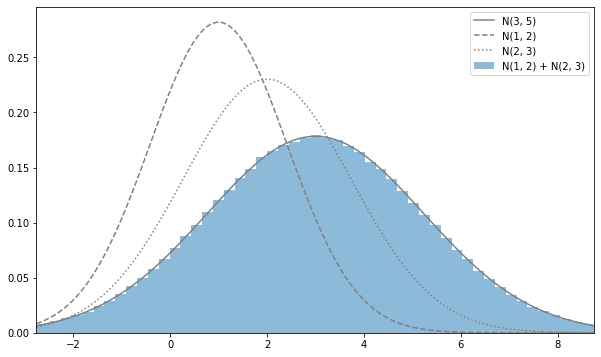

In [36]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5)) # X+Y ~ N(3,√5)
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100) #rv가 99.5%와 0.5%가 되는 x값 사이에서 총 100개의 랜덤 x 값 생성

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray') #xs값을 기준으로 rv의 확률밀도 함수 생성
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray' )

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

### 9.2.2 포아송 분포의 합의 분포
: 서로 독립인 확률변수 $X_1 \sim Poi(\lambda_1), X_2 \sim Poi(\lambda_2), ... , X_n \sim Poi(\lambda_n)$에 관해서, 아래의 공식이 성립한다.
$$\sum_{i = 1}^n{X_i} \sim Poi(\sum_{i = 1}^n{\lambda_i})$$

In [45]:
rv1 = stats.poisson(3) #람다가 3,4인 포아송 분포 2개 생성
rv2 = stats.poisson(4)

sample_size = int(1e6) #1000000개의 sample size 지정
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

print(f'E(X+Y) = {np.mean(sum_sample) : .3f}, E(X) + E(Y) = {rv1.mean() + rv2.mean()}',
      f'\nV(X+Y) = {np.var(sum_sample) : .3f}, V(X) + V(Y) = {rv1.var() + rv2.var()} \n') #이론에 가까운 값이 나옴을 확인 가능

E(X+Y) =  6.993, E(X) + E(Y) = 7.0 
V(X+Y) =  6.993, V(X) + V(Y) = 7.0 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


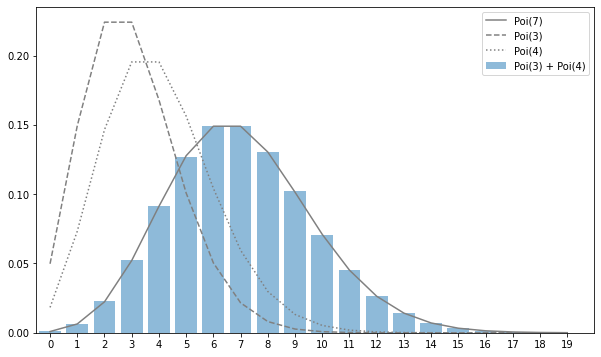

In [41]:
# 두 포아송 분포의 합 확인 = 재생성에 의해 포아송 분포의 형태 유지
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20,
                       range=(0, 20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)',  color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':',  color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

### 9.2.3 베르누이 분포의 합의 분포
: 서로 독립인 확률변수 $X_1, X_2, ... , X_n \sim Bern(p)$에 관해서, 아래의 공식이 성립한다.
$$\sum_{i = 1}^n{X_i} \sim Bin(n,p)$$

In [49]:
# X_i의 총 10개의 합
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size)) #n=10인 샘플 10개 생성
sum_sample = np.sum(Xs_sample, axis=0)

print(f'E(X+Y) = {np.mean(sum_sample) : .3f}, E(X1+...+X10) = {rv.mean()*10}',
      f'\nV(X+Y) = {np.var(sum_sample) : .3f}, V(X1+...+X10) = {rv.var()*10} \n') #이론에 가까운 값이 나옴을 확인 가능

E(X+Y) =  2.998, E(X1+...+X10) = 3.0 
V(X+Y) =  2.094, V(X1+...+X10) = 2.1 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


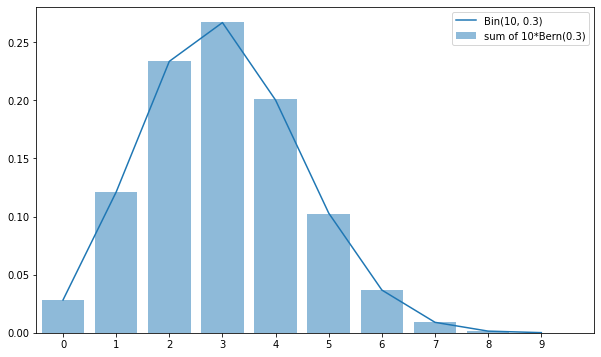

In [50]:
#베르누이 분포는 재생성 없음 → 베르누이 분포의 합 = 이항분포
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10,
                       range=(0, 10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

## 9.3 표본평균의 분포
**표본평균의 합의 확률분포**</br>
: 서로 독립이고 동일한 확률 분포를 따르는 $X_1, X_2, ... X_n$의 표본평균 $\overline{X} = {X_1+X_2+ ... +X_n \over n}$이 따르는 확률 분포
- 확률변수 합의 기댓값</br>
: 확률 변수 $X_1, X_2, ... X_n$이 독립이고 기댓값과 분산이 $\mu$, 분산이 $\sigma^2$인 확률분포 F를 따를 때, 아래의 공식이 성립한다.  
$$ E(\overline{X}) = E({X_1+X_2+ ... +X_n \over n}) = {E(X_1) + E(X_2) + ... + E(X_n) \over n} = {n\mu \over n} = \mu $$
- 확률변수 합의 분산값</br>
: 확률 변수 $X_1, X_2, ... X_n$이 독립이고 기댓값이 $\mu$, 분산이 $\sigma^2$인 확률분포 F를 따를 때, 아래의 공식이 성립한다.
$$V(\overline{X}) = V({X_1+X_2+ ... +X_n \over n}) = {V(X_1) + V(X_2) + ... + V(X_n) \over n^2} = {n\sigma^2 \over n^2} = {\sigma^2 \over n}$$

### 9.3.1 정규분포의 표본평균 분포
서로 독립인 확률변수 $X_1, X_2, ... , X_n \sim N(\mu, \sigma^2)$에 관해서, 아래의 공식이 성립한다.
$$\overline{X} \sim N(\mu,{\sigma^2 \over n})$$

In [70]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var)) #rv ~ N(1,√2) 정규분포 생성

n = 10
sample_size = int(1e6) #1000000개의 sample size 지정
Xs_sample = rv.rvs((n, sample_size)) #n=1000000인 10개의 sample 생성
sample_mean = np.mean(Xs_sample, axis=0) #정규분포에서 10개의 표본에 대한 표본평균 분포 생성
print(sample_mean)
print(f'E(bar X) = {np.mean(sample_mean) : .3f}, E(X1+...+X10) = {rv.mean()*10/10}',
      f'\nV(bar X) = {np.var(sample_mean) : .3f}, V(X1+...+X10) = {rv.var()/10 : .3f} \n') #이론에 가까운 값이 나옴을 확인 가능

[0.704 1.028 1.289 ... 1.516 1.173 0.741]
E(bar X) =  1.000, E(X1+...+X10) = 1.0 
V(bar X) =  0.200, V(X1+...+X10) =  0.200 



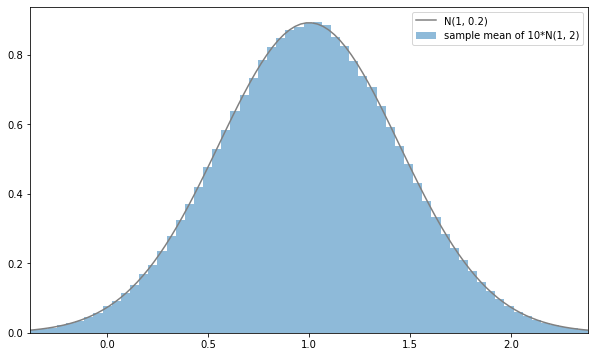

In [65]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n)) #표본정규분포 생성
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 9.3.2 포아송 분포의 표본평균 분포
서로 독립인 확률변수 $X_1, X_2, ... , X_n \sim N(\mu, \sigma^2)$에 관해서, 아래의 공식이 성립한다.
$$\overline{X} \sim N(\mu,{\sigma^2 \over n})$$

In [73]:
l = 3
rv = stats.poisson(l) #lamda = 3인 포아송 분포

n = 10
sample_size = int(1e6) #1000000개의 sample size 지정
Xs_sample = rv.rvs((n, sample_size)) #n = 1000000인 샘플 10개 생성
sample_mean = np.mean(Xs_sample, axis=0) #10개의 평균으로 표본평균 분포 생성

print(sample_mean)
print(f'E(bar X) = {np.mean(sample_mean) : .3f}, E(X1+...+X10) = {rv.mean()}',
      f'\nV(bar X) = {np.var(sample_mean) : .3f}, V(X1+...+X10) = {rv.var()/10 : .3f} \n') #이론에 가까운 값이 나옴을 확인 가능

[2.4 3.3 3.  ... 2.4 2.4 3.8]
E(bar X) =  3.000, E(X1+...+X10) = 3.0 
V(bar X) =  0.300, V(X1+...+X10) =  0.300 



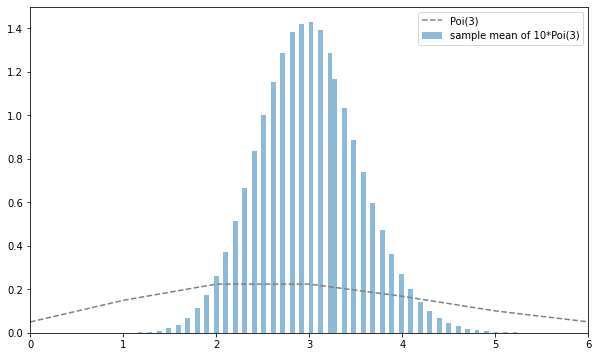

In [76]:
#포아송 분포의 표본평균 분포는 정규분포를 따름
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, rv.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

### 9.3.3 중심극한정리
**중심극한정리(Central limit theorem)**</br>
: 확률 변수 $X_1, X_2, ... X_n$이 독립이고 기댓값과 분산이 $\mu$, 분산이 $\sigma^2$인 확률분포 F를 따를 때,</br>$\;$ n이 커짐에 따라 $\overline{X}$의 분포는 정규분포 $N(\mu,{\sigma^2 \over n})$에 가까워진다.

In [77]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

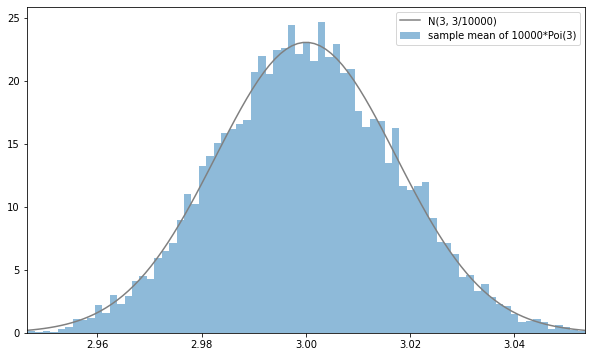

In [78]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 9.3.4 대수의 법칙
**대수의 법칙(law of large numbers)**</br>
: 확률변수 $X_1, X_2, ..., X_n$이 서로 독립이고, 평균이 $\mu$, 분산이 $\sigma^2$일 것 같은 확률분포를 따를 때,</br>$\;$n이 커짐에 따라 표본평균은 $\mu$에 수렴한다.

In [79]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                      for sp in space]).T

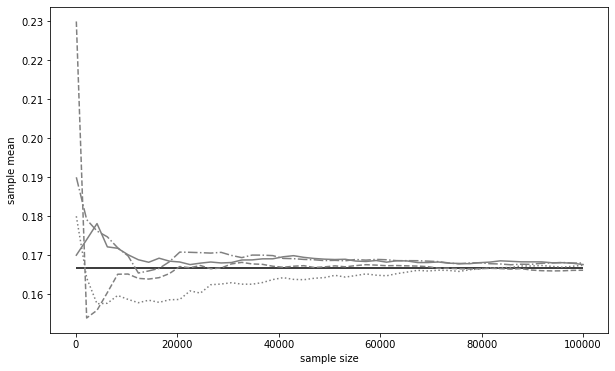

In [80]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()